In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, auc, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import lime
import lime.lime_tabular
import pickle
from sklearn.datasets import load_iris
import shap

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [13]:
test = pd.read_csv("churn-bigml-20.csv")
train = pd.read_csv("churn-bigml-80.csv")

# <font color="purple"> Business Understanding

This study highlights the importance of both predicting and explaining customer churn using machine learning models for actionable business insights.
Key Business Challenge: Predicting churn is not enough; understanding the why behind churn is critical for decision-makers to implement effective retention strategies.
Approach: The Gradient Boosting Machine (GBM) outperformed other models with 81% accuracy for churn prediction. Techniques like SHapley Additive exPlanations (SHAP) were used to provide both global explanations (overall churn factors) and local explanations (reasons for individual churn cases).
Business Benefit: Companies gain deeper insights into the specific reasons driving customer churn

# <font color="purple"> Data Understanding

In [14]:
df = pd.concat([test, train], ignore_index=True)

In [15]:
df.shape

(3333, 20)

In [16]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [18]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [19]:
df.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [20]:
duplicates = df[df.duplicated()]
if not duplicates.empty:
    print("\nDuplicate rows in the merged dataset:")
    print(duplicates)
else:
    print("\nNo duplicate rows found in the merged dataset.")


No duplicate rows found in the merged dataset.


In [21]:
churners = df[df['Churn'] == 1]
non_churners = df[df['Churn'] == 0]

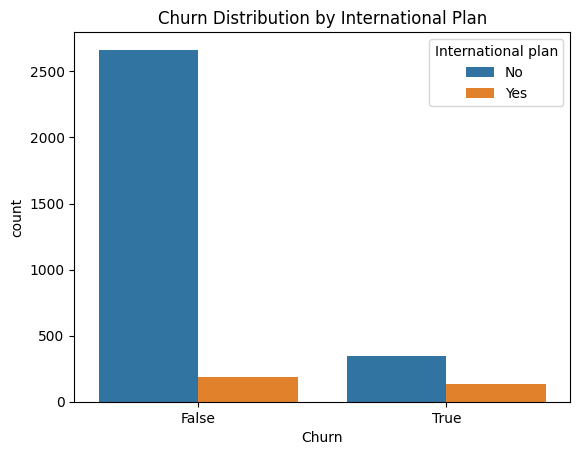

In [22]:
sns.countplot(data=df, x='Churn', hue='International plan')
plt.title('Churn Distribution by International Plan')
plt.show()

# <font color="purple"> Data Preparation

<div style="font-size:large; font-weight:bold">
    <font color="#1835c2">Label Encoding</font>
</div>

In [23]:
colonne_categorielle = 'State'

valeurs_uniques = df[colonne_categorielle].value_counts()

pd.set_option('display.max_rows', len(valeurs_uniques))
print(valeurs_uniques)

State
WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
VA     77
WY     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
KS     70
MD     70
MT     68
NJ     68
NC     68
NV     66
WA     66
CO     66
MA     65
MS     65
RI     65
AZ     64
FL     63
MO     63
NM     62
ND     62
ME     62
OK     61
NE     61
DE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64


In [24]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['State'] = label_encoder.fit_transform(df['State'])
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,15,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,34,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,40,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,11,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [25]:
colonne_categorielle = 'International plan'

valeurs_uniques = df[colonne_categorielle].value_counts()

pd.set_option('display.max_rows', len(valeurs_uniques))
print(valeurs_uniques)

International plan
No     3010
Yes     323
Name: count, dtype: int64


In [26]:
df['International plan']=df['International plan'].apply(lambda x: 1 if x == 'Yes' else 0)

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,117,408,0,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,11,49,510,0,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [27]:
colonne_categorielle = 'Voice mail plan'

valeurs_uniques = df[colonne_categorielle].value_counts()

pd.set_option('display.max_rows', len(valeurs_uniques))
print(valeurs_uniques)

Voice mail plan
No     2411
Yes     922
Name: count, dtype: int64


In [28]:
df['Voice mail plan']=df['Voice mail plan'].apply(lambda x: 1 if x == 'Yes' else 0)

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,11,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [29]:
colonne_categorielle = 'Churn'

valeurs_uniques = df[colonne_categorielle].value_counts()

pd.set_option('display.max_rows', len(valeurs_uniques))
print(valeurs_uniques)

Churn
False    2850
True      483
Name: count, dtype: int64


In [30]:
df['Churn'] = df['Churn'].map({True: 1, False: 0})

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,11,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


In [31]:
colonne_categorielle = 'Churn'

valeurs_uniques = df[colonne_categorielle].value_counts()

pd.set_option('display.max_rows', len(valeurs_uniques))
print(valeurs_uniques)

Churn
0    2850
1     483
Name: count, dtype: int64


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   int64  
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   int64  
 4   Voice mail plan         3333 non-null   int64  
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

<div style="font-size:large; font-weight:bold">
    <font color="#1835c2">Feature Selection</font>
</div>

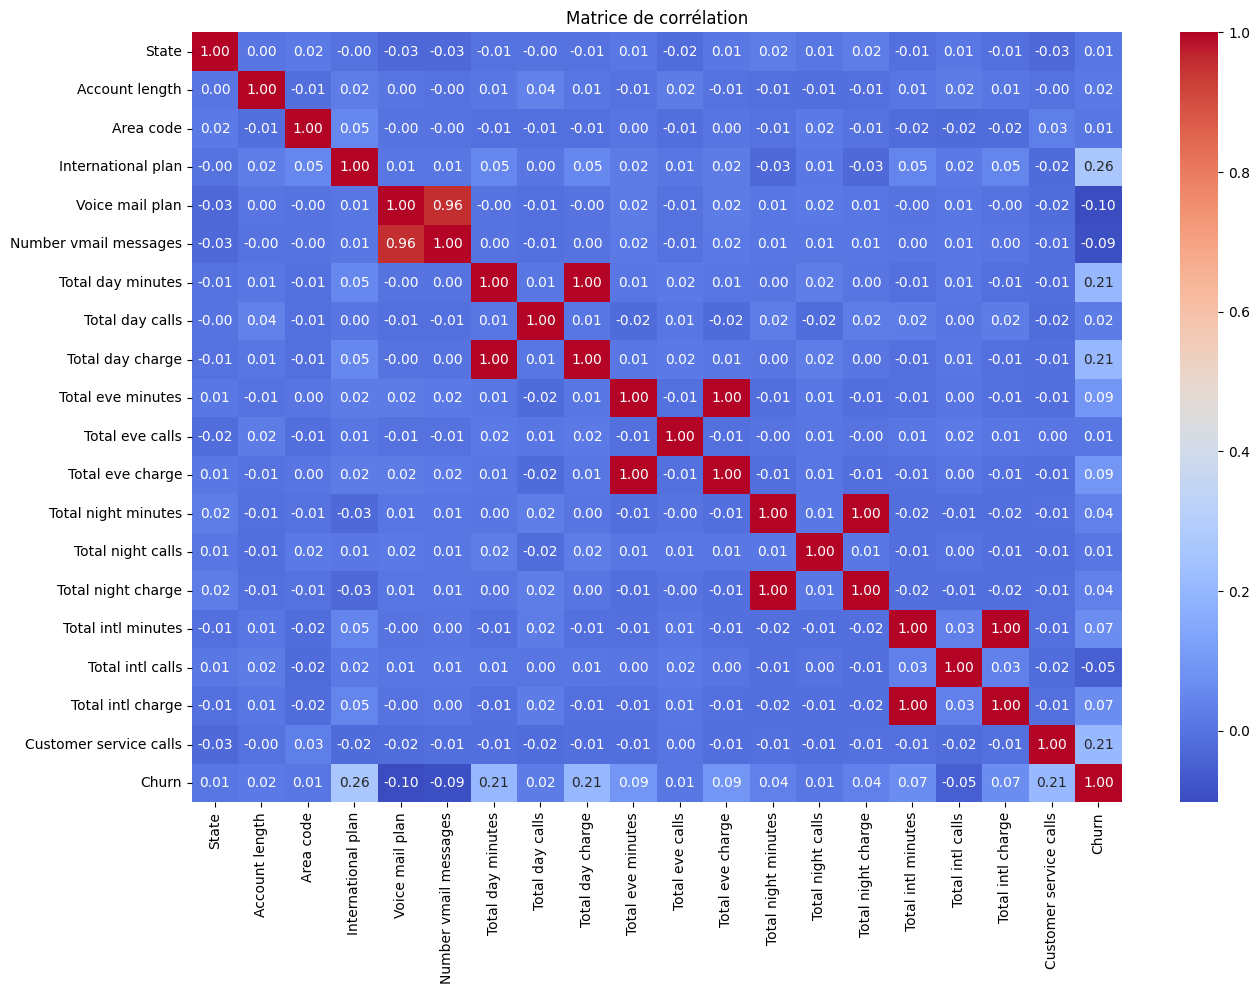

In [33]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

In [34]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_columns.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

print(f"Colonnes à supprimer (corrélation > 0.95): {to_drop}")

Colonnes à supprimer (corrélation > 0.95): ['Number vmail messages', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']


In [35]:
# df.drop(columns=['Number vmail messages', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge'], inplace=True)

In [36]:
df.shape

(3333, 20)

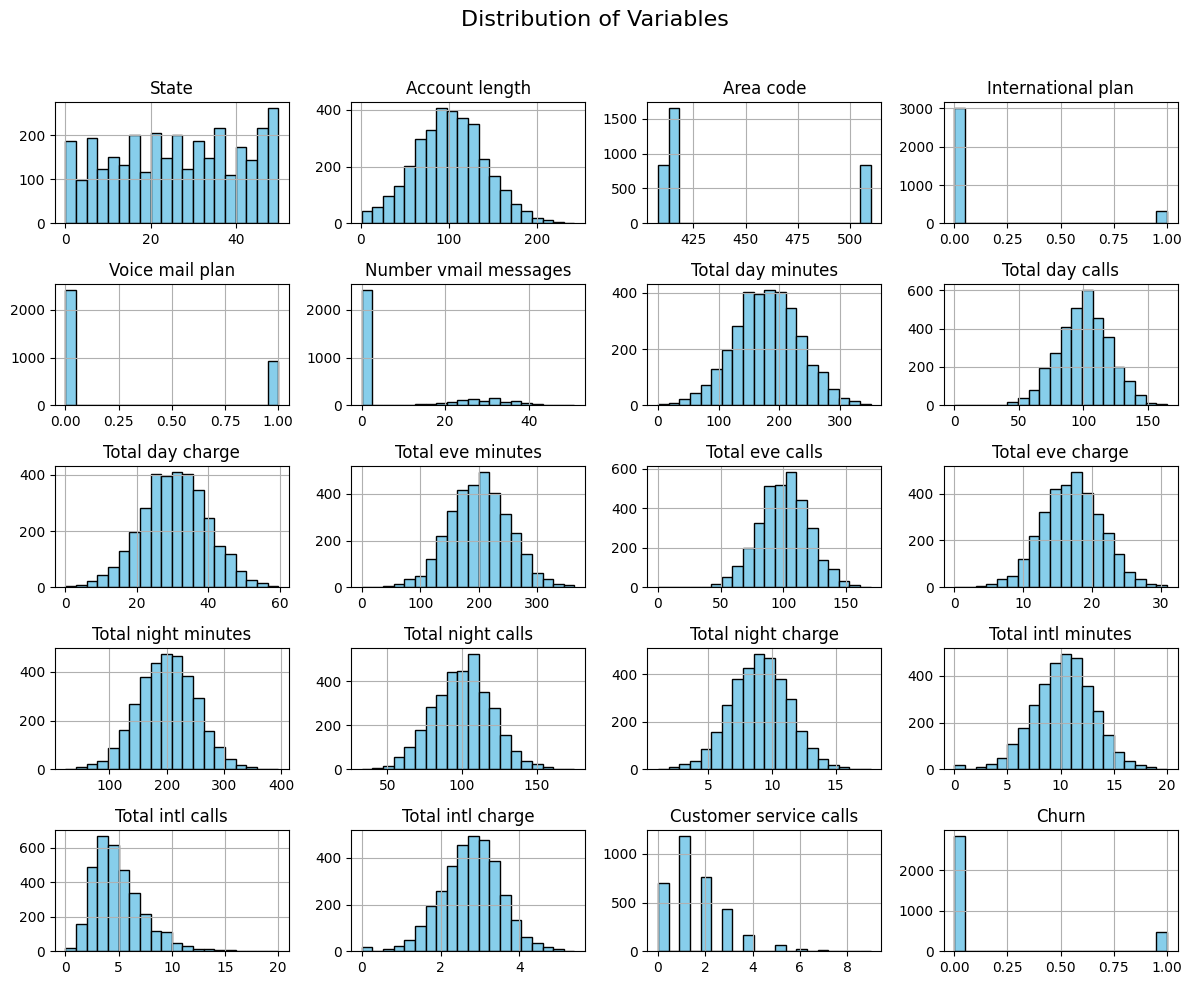

In [37]:
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')

plt.suptitle('Distribution of Variables', fontsize=16)

# Ajuster les espaces entre les sous-graphiques
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

<div style="font-size:large; font-weight:bold">
    <font color="#1835c2"> Outliers</font>
</div>

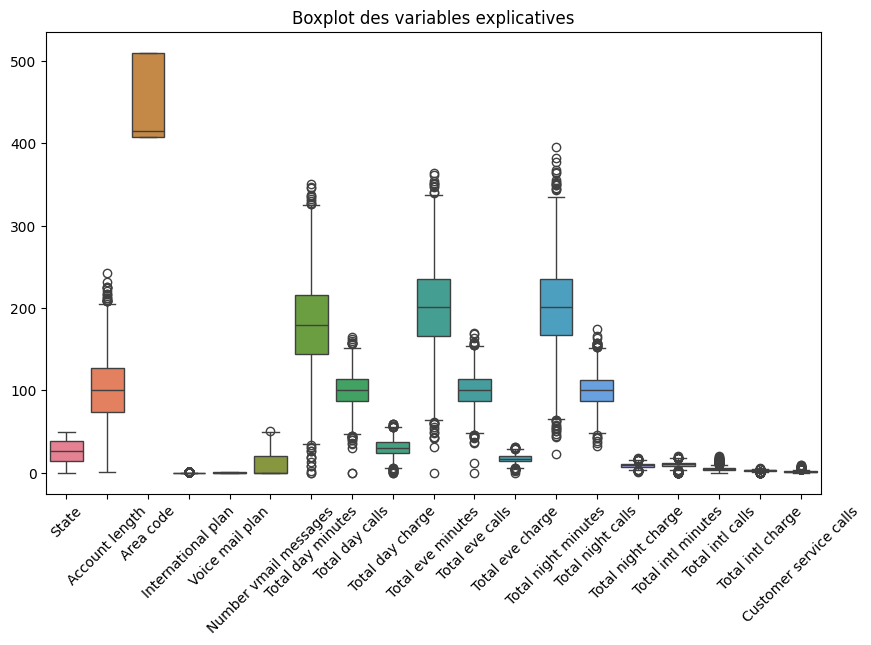

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['Churn']))
plt.title('Boxplot des variables explicatives')
plt.xticks(rotation=45)
plt.show()

In [39]:
# 3. Identification des colonnes
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
binary_cols = ['International plan', 'Voice mail plan', 'Churn']  # Colonnes binaires identifiées
non_binary_numerical_cols = [col for col in numerical_cols if col not in binary_cols]

# --- Fonction de traitement des outliers avec IQR ---
def get_iqr_bounds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

def handle_outliers_with_iqr(df, column, lower_bound, upper_bound):
    # Remplacer les outliers par les bornes
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Appliquer le traitement des outliers uniquement sur les colonnes numériques non binaires
for col in non_binary_numerical_cols:
    # Calcul des bornes pour le train dataset
    lower_bound, upper_bound = get_iqr_bounds(df, col)
    df = handle_outliers_with_iqr(df, col, lower_bound, upper_bound)

In [40]:
colonne_categorielle = 'Churn'

valeurs_uniques = df[colonne_categorielle].value_counts()

pd.set_option('display.max_rows', len(valeurs_uniques))
print(valeurs_uniques)

Churn
0    2850
1     483
Name: count, dtype: int64


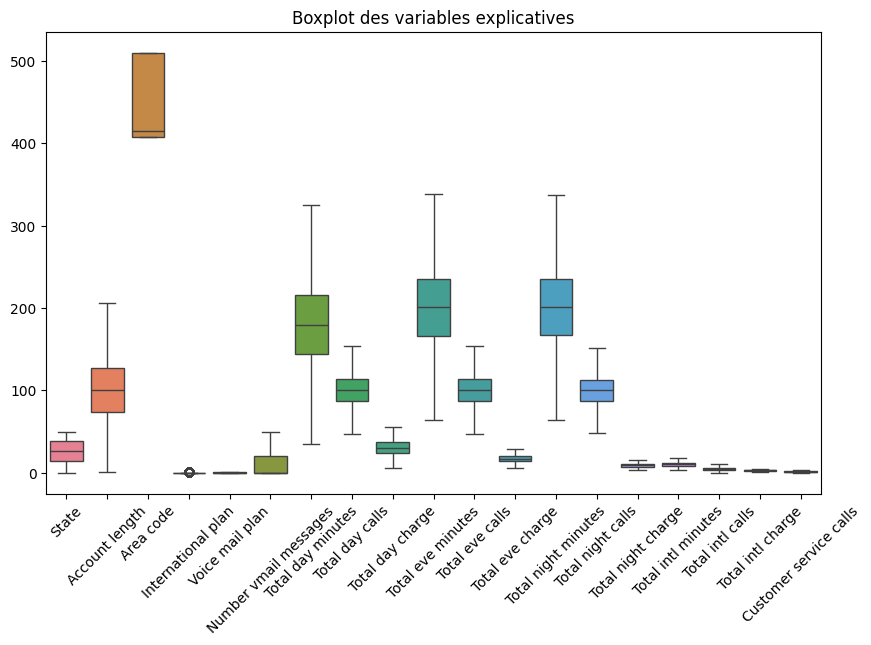

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['Churn']))
plt.title('Boxplot des variables explicatives')
plt.xticks(rotation=45)
plt.show()

<div style="font-size:large; font-weight:bold">
    <font color="#1835c2">SMOTE/ENN</font>
</div>

In [42]:
x = df.drop(columns=['Churn'])
y = df['Churn']

<ipython-input-43-a0161543ce3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette=['#e6843b', '#3be6c7'])


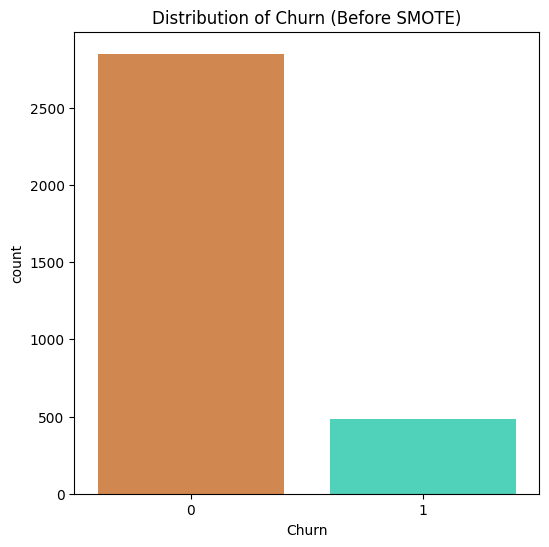

<ipython-input-43-a0161543ce3d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette=['#e6843b', '#3be6c7'])


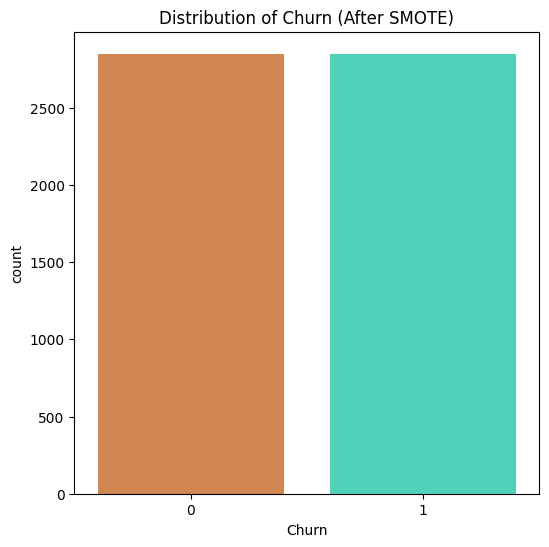

In [43]:
plt.figure(figsize=(6, 6))
sns.countplot(x=y, palette=['#e6843b', '#3be6c7'])
plt.title('Distribution of Churn (Before SMOTE)')
plt.show()

# Appliquer SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

plt.figure(figsize=(6, 6))
sns.countplot(x=y_resampled, palette=['#e6843b', '#3be6c7'])
plt.title('Distribution of Churn (After SMOTE)')
plt.show()

<div style="font-size:large; font-weight:bold">
    <font color="#1835c2">PCA</font>
</div>


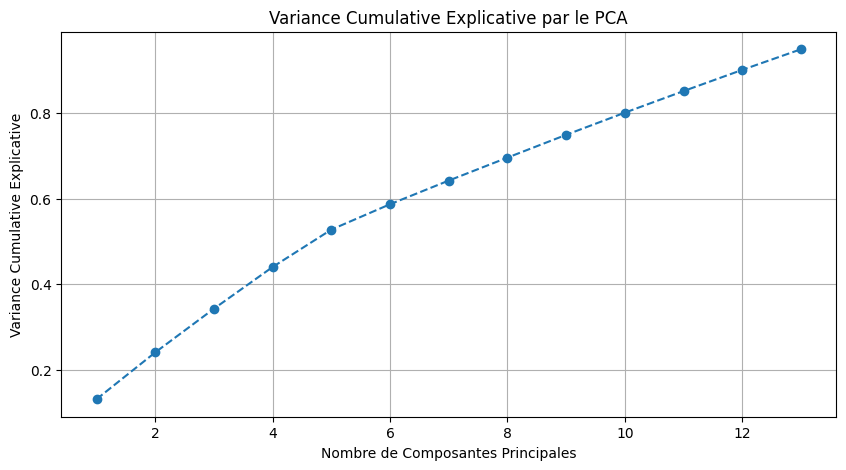

                             PC1       PC2       PC3       PC4       PC5  \
State                   0.055726 -0.008191 -0.006385  0.002364 -0.007074   
...                          ...       ...       ...       ...       ...   
Customer service calls -0.175736 -0.044644  0.029187 -0.124936 -0.149736   

                             PC6       PC7       PC8       PC9      PC10  \
State                   0.245577  0.502991  0.203265  0.008454  0.597083   
...                          ...       ...       ...       ...       ...   
Customer service calls -0.118908 -0.295690  0.099915  0.315068  0.146026   

                            PC11      PC12      PC13  
State                  -0.177268 -0.252423 -0.413843  
...                          ...       ...       ...  
Customer service calls  0.027141 -0.462600  0.295059  

[19 rows x 13 columns]


In [44]:
features = X_resampled.select_dtypes(include=[np.number])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

pca = PCA(n_components=13)
pca_data = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Variance Cumulative Explicative par le PCA')
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Variance Cumulative Explicative')
plt.grid()
plt.show()

loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=features.columns)
print(loadings)

In [45]:
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10','PC11','PC12','PC13']
x_pca = pd.DataFrame(pca_data, columns=columns)

# <font color="purple"> Modeling

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=1)

In [47]:
# Filtrer les indices pour chaque classe
index_class_0 = y_train[y_train == 0].index[0]  # Premier indice où y_train vaut 0
index_class_1 = y_train[y_train == 1].index[0]  # Premier indice où y_train vaut 1

# Extraire les données correspondantes
X_test_later = X_train.loc[[index_class_0, index_class_1]]
y_test_later = y_train.loc[[index_class_0, index_class_1]]

# Supprimer ces lignes des ensembles d'entraînement
X_train = X_train.drop(index=[index_class_0, index_class_1])
y_train = y_train.drop(index=[index_class_0, index_class_1])

# Affichage
print("Données pour test ultérieur (X):\n", X_test_later)
print("Données pour test ultérieur (y):\n", y_test_later)

Données pour test ultérieur (X):
          State  Account length   Area code  International plan  \
165   28.00000      167.000000  408.000000                   1   
4177  26.55717       98.263384  412.715631                   0   

      Voice mail plan  Number vmail messages  Total day minutes  \
165                 0                    0.0         219.100000   
4177                0                    0.0         269.620043   

      Total day calls  Total day charge  Total eve minutes  Total eve calls  \
165        100.000000         37.250000         242.900000        90.000000   
4177       112.820555         45.834428         231.252462       116.736616   

      Total eve charge  Total night minutes  Total night calls  \
165          20.650000           168.900000         101.000000   
4177         19.654407           179.136831          60.673662   

      Total night charge  Total intl minutes  Total intl calls  \
165             7.600000           10.100000          4.000000

<div style="font-size:large; font-weight:bold">
    <font color=magenta>1) Random Forest Classifier</font>
</div>

In [48]:
rfc = RandomForestClassifier(n_estimators=100, criterion="gini", random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [49]:
y_predRFC = rfc.predict(X_test)

In [50]:
print("Accuracy for RandomForestClassifier: {:.3f}".format(accuracy_score(y_test, y_predRFC)))

Accuracy for RandomForestClassifier: 0.956


In [51]:
print("Classification Report:\n", classification_report(y_test, y_predRFC))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       578
           1       0.96      0.95      0.96       562

    accuracy                           0.96      1140
   macro avg       0.96      0.96      0.96      1140
weighted avg       0.96      0.96      0.96      1140



<div style="font-size:large; font-weight:bold">
    <font color=magenta>2) Decision Tree Classifier</font>
</div>

In [52]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
y_predDCT = dtc.predict(X_test)

In [54]:
print("Accuracy for RandomForestClassifier: {:.3f}".format(accuracy_score(y_test, y_predDCT)))

Accuracy for RandomForestClassifier: 0.915


In [55]:
print("Classification Report:\n", classification_report(y_test, y_predDCT))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       578
           1       0.91      0.91      0.91       562

    accuracy                           0.91      1140
   macro avg       0.91      0.91      0.91      1140
weighted avg       0.91      0.91      0.91      1140



<div style="font-size:large; font-weight:bold">
    <font color=magenta>3) Logistic Regression</font>
</div>

In [ ]:
log_reg = LogisticRegression(random_state=42)

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],  # Régularisation inverse
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Algorithmes d'optimisation
    'max_iter': [100, 200, 500]
}

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='accuracy',  # Peut être changé pour 'f1', 'roc_auc', etc.
    cv=5,  # Validation croisée à 5 plis
    verbose=1,
    n_jobs=-1  # Utiliser tous les cœurs disponibles
)

# Exécution du GridSearch
grid_search.fit(X_train, y_train)

print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Score du meilleur modèle
print("Score du meilleur modèle :", grid_search.best_score_)

# Modèle optimisé
log_reg = grid_search.best_estimator_

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [ ]:
y_pred_log_reg = log_reg.predict(X_test)

In [ ]:
print("Accuracy for RandomForestClassifier: {:.3f}".format(accuracy_score(y_test, y_pred_log_reg)))

In [ ]:
print("Classification Report:\n", classification_report(y_test,  y_pred_log_reg))

<div style="font-size:large; font-weight:bold">
    <font color=magenta>4) Light GBM</font>
</div>

In [ ]:
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)
lgb_model.fit(X_train, y_train)

In [ ]:
y_predLGB = lgb_model.predict(X_test)

In [ ]:
print("Accuracy for RandomForestClassifier: {:.3f}".format(accuracy_score(y_test, y_predLGB)))

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_predLGB))

In [ ]:
features = np.array([[
    28,                  # State
    167.0,                   # Account length
    408.0,                  # area code
    1,                    # international plan
    0,                # voice mail plan
    0.0,                  # Tnumber vmail messages
    219.1,                # total day minutes
    100.0,                # total day calls
    37.25,                 # total day charge
    242.9,                    # total eve minutes
    90.0,                    # total eve calls
    20.65,                # total eve charge
    168.9,                   # total night minutes
    101.0,                   # total night calls
    7.60,                   # total night charge
    10.1,                    # total intl minutes
    4.0,                    # total intl calls
    2.73,                    # total intl charge
    2.0,                    # customer service calls
]])
prediction = lgb_model.predict(features)
print(prediction)

In [ ]:
features = np.array([[
    26,                  # State
    98.263384,                   # Account length
    412.715631,                  # area code
    0,                    # international plan
    0,                # voice mail plan
    0.0,                  # Tnumber vmail messages
    269.620043,                # total day minutes
    112.820555,                # total day calls
    45.834428,                 # total day charge
    231.252462,                    # total eve minutes
    116.736616,                    # total eve calls
    19.654407,                # total eve charge
    179.136831,                   # total night minutes
    60.673662,                   # total night calls
    8.063473,                   # total night charge
    7.789508,                    # total intl minutes
    4.326338,                    # total intl calls
    2.103799,                    # total intl charge
    1.347323,                    # customer service calls
]])
prediction = lgb_model.predict(features)
print(prediction)

<div style="font-size:large; font-weight:bold">
    <font color=magenta>5) Neural Network</font>
</div>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Construire le modèle de réseau de neurones
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # 1ère couche cachée
    Dense(32, activation='relu'),  # 2ème couche cachée
    Dense(1, activation='sigmoid')  # Couche de sortie (sigmoid pour classification binaire)
])

#Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

#Entraîner le modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

#Évaluer le modèle sur les données de test
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

In [ ]:
y_predN = model.predict(X_test)
y_predNeural = (y_predN > 0.5).astype(int)

In [ ]:
print("Accuracy for Neural Network: {:.3f}".format(accuracy_score(y_test, y_predNeural)))

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_predNeural))

<div style="font-size:large; font-weight:bold">
    <font color=magenta>6) SVM</font>
</div>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_pca,y_resampled, test_size=0.2, random_state=1)

In [ ]:
# Filtrer les indices pour chaque classe
index_class_0 = y_train[y_train == 0].index[0]  # Premier indice où y_train vaut 0
index_class_1 = y_train[y_train == 1].index[0]  # Premier indice où y_train vaut 1

# Extraire les données correspondantes
X_test_later = X_train.loc[[index_class_0, index_class_1]]
y_test_later = y_train.loc[[index_class_0, index_class_1]]

# Supprimer ces lignes des ensembles d'entraînement
X_train = X_train.drop(index=[index_class_0, index_class_1])
y_train = y_train.drop(index=[index_class_0, index_class_1])

# Affichage
print("Données pour test ultérieur (X):\n", X_test_later)
print("Données pour test ultérieur (y):\n", y_test_later)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir les paramètres à tester
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 'scale', 'auto'],
    'kernel': ['rbf']
}

# Appliquer GridSearchCV
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Meilleurs paramètres
best_params = grid_search.best_params_
print("Meilleurs paramètres :", best_params)

# Modèle optimisé
svm_model = grid_search.best_estimator_


In [ ]:
y_predSVM = svm_model.predict(X_test)

In [ ]:
print("Accuracy for RandomForestClassifier: {:.3f}".format(accuracy_score(y_test, y_predSVM)))

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_predSVM))

In [ ]:
features = np.array([[
    -0.813073,                  # PC1
    1.166090,                   # PC2
    1.095324,                  # PC3
    -0.673291,                    # PC4
    0.096823,                # PC5
    0.553818,                  # PC6
    1.763725,                # PC7
    2.192709,                # PC8
    -0.575192,                 # PC9
    0.560501,                    # PC10
    -0.805675,                    # PC11
    -0.441453,                # PC12
    0.983824,                   # PC13
]])
prediction = svm_model.predict(features)
print(prediction)

In [ ]:
features = np.array([[
    -1.656377,                  # PC1
    -0.527717,                   # PC2
    1.551314,                  # PC3
    -0.990849,                    # PC4
    1.061315,                # PC5
    -1.495754,                  # PC6
    -0.214351,                # PC7
    0.498329,                # PC8
    -0.416645,                 # PC9
    0.114849,                    # PC10
    1.643956,                    # PC11
    -0.084759,                # PC12
    -0.539539,                   # PC13
]])
prediction = svm_model.predict(features)
print(prediction)

# <font color="purple"> Evaluation

<div style="font-size:large; font-weight:bold">
    <font color=magenta>1) Confusion Matrix</font>
</div>

In [ ]:
conf_matrix_dtc = confusion_matrix(y_test, y_predDCT)  # For Decision Tree
conf_matrix_rfc = confusion_matrix(y_test, y_predRFC)  # For Random Forest
conf_matrix_lgb = confusion_matrix(y_test, y_predLGB)  # For Light GBM
conf_matrix_svm = confusion_matrix(y_test, y_predSVM)  #For SVM
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)  # For Logistic Regression
conf_matrix_neural = confusion_matrix(y_test, y_predNeural)  #For Neural Network

# Configurer la figure avec des sous-graphiques
fig, axes = plt.subplots(3, 2, figsize=(20, 10))

# Random Forest
sns.heatmap(conf_matrix_rfc, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Random Forest')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# Decision Tree
sns.heatmap(conf_matrix_dtc, annot=True, fmt='d', cmap='Greens', ax=axes[0, 1])
axes[0, 1].set_title('Decision Tree')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# Logistic Regression
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='BuPu', ax=axes[1, 0])
axes[1, 0].set_title('Logistic Regression')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

# LightGBM
sns.heatmap(conf_matrix_lgb, annot=True, fmt='d', cmap='Oranges', ax=axes[1, 1])
axes[1, 1].set_title('Light GBM')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

# Neural Network
sns.heatmap(conf_matrix_neural, annot=True, fmt='d', cmap='Reds', ax=axes[2, 0])
axes[2, 0].set_title('Neural Network')
axes[2, 0].set_xlabel('Predicted')
axes[2, 0].set_ylabel('Actual')

# SVM
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Purples', ax=axes[2, 1])
axes[2, 1].set_title('Support Vector Machine')
axes[2, 1].set_xlabel('Predicted')
axes[2, 1].set_ylabel('Actual')


# Ajuster les espacements
plt.tight_layout()
plt.show()

<div style="font-size:large; font-weight:bold">
    <font color=magenta>2) F1 Score</font>
</div>

In [ ]:
f1_rfc = f1_score(y_test, y_predRFC, average='weighted')  # Random Forest
f1_dtc = f1_score(y_test, y_predDCT, average='weighted')  # Decision Tree
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')  # Logistic Regression
f1_lgb = f1_score(y_test, y_predLGB, average='weighted')  # Light GBM
f1_neural = f1_score(y_test, y_predNeural, average='weighted')  # Neural Network
f1_svm = f1_score(y_test, y_predSVM, average='weighted')  # SVM

# Préparer les données pour le graphique
model_names = ['Random Forest', 'Decision Tree','Logistic Regression','Light GBM','Neural Network','SVM']
f1_scores = [f1_rfc, f1_dtc, f1_log_reg, f1_lgb, f1_neural, f1_svm]

# Créer le graphique en barres
plt.figure(figsize=(10, 10))
plt.bar(model_names, f1_scores, color=['#083b7c', '#004e1f','#670864','#7f2704','#6f020e','#460d83'])
plt.ylabel("F1 Score (pondéré)")
plt.title("Comparaison des F1 Scores des Modèles")
plt.ylim(0, 1)  # Limiter l'échelle entre 0 et 1
plt.show()

<div style="font-size:large; font-weight:bold">
    <font color=magenta>3) ROC</font>
</div>

In [ ]:
# Calcul des courbes ROC et des AUC
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_predRFC)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_predDCT)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_predLGB)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_predSVM)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

fpr_neural, tpr_neural, _ = roc_curve(y_test, y_predNeural)
roc_auc_neural = auc(fpr_neural, tpr_neural)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest (AUC = %0.2f)' % roc_auc_rfc, color='#083b7c', lw=2)
plt.plot(fpr_dtc, tpr_dtc, label='Decision Tree (AUC = %0.2f)' % roc_auc_dtc, color='#004e1f', lw=2)
plt.plot(fpr_lgb, tpr_lgb, label='Light GBM (AUC = %0.2f)' % roc_auc_lgb, color='orange', lw=2)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.2f)' % roc_auc_svm, color='purple', lw=2)
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log_reg, color='pink', lw=2)
plt.plot(fpr_neural, tpr_neural, label='Neural Network (AUC = %0.2f)' % roc_auc_neural, color='red', lw=2)

# Ajouter la diagonale "sans discrimination"
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Sans discrimination')

# Configurer le graphique
plt.xlabel('Taux de Faux Positifs (False Positive Rate)')
plt.ylabel('Taux de Vrais Positifs (True Positive Rate)')
plt.title('Courbes ROC pour les trois modèles')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import shap

# Use your trained model on the balanced datasets
print("Generating SHAP plots for Random Forest...")
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

# If it's a binary classification model, shap_values is typically a list of two arrays:
# shap_values[0] for class 0, shap_values[1] for class 1 (positive class).
if isinstance(shap_values, list):
    shap_values_class = shap_values[1]
else:
    shap_values_class = shap_values[..., 1]

# Check shapes
print("SHAP values shape:", shap_values_class.shape)
print("X_test_balanced shape:", X_test.shape)


# If not a DataFrame, convert X_test_balanced to DataFrame as well
if not isinstance(X_test, pd.DataFrame):
    X_test_balanced_df = pd.DataFrame(X_test, columns=all_columns_minmax)
else:
    X_test_balanced_df = X_test

# Summary Beeswarm Plot for the balanced test set
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values_class, X_test_balanced_df)

# Dependence plots for all features:
# This shows each feature's SHAP values vs. that feature's values,
# with points colored by the feature that shows the strongest interaction.
for feature_index in range(X_test.shape[1]):
    shap.dependence_plot(feature_index, shap_values_class, X_test_balanced_df)

# Each point on the SHAP dependence plot represents a single customer (data instance).
# The x-axis shows the value of the "Account length" feature for that customer, indicating how long they have been with the company.
# The y-axis is the SHAP value, showing how much having that particular account length influences the model’s prediction for churn (either pushing towards or away from churn).
# The color of the points (from blue to red) represents the value of another feature that interacts with "Account length," in this case "Total intl calls."
# Red points indicate higher values of the interaction feature, while blue points indicate lower values.
# By looking at this plot, we can see not only how "Account length" affects churn predictions,
# but also how its effect changes depending on the customer’s international calling patterns.


# <font color="purple"> Deployment

In [ ]:
with open('modellgb.pkl', 'wb') as f:
    pickle.dump(lgb_model, f)

In [ ]:
import joblib

# Enregistrez le modèle dans un fichier
joblib.dump(rfc, 'modellgb.pkl')